# Bail Data - OCA Pretrial Release

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.set_palette("Set1")

In [3]:
df = pd.read_csv("PretrialReleaseDataExtractWeb2020-revised.csv")

In [ ]:
df.sample(10)

In [4]:
df.columns = df.columns.str.lower()

## Electronic Monitoring

In [43]:
[col for col in df.columns if "passport" in col]

['passport_surrender']

In [44]:
em_df = df[["county_name", "arrest_date", "first_arraign_date",
            "top_charge_at_arraign", "top_arraign_article_section", 
            "pretrial_supervision_at_arraign", "contact_pretrial_service_agency", 
            "electronic_monitoring", "travel_restrictions",
            "passport_surrender","no_firearms_or_weapons","maintain_employment",
            "maintain_housing", "maintain_school", "placement_in_mandatory_program", 
            "nmr_at_arraign", "release decision at arraign"]]

In [45]:
em_df.electronic_monitoring.value_counts()

N    183207
Y       911
Name: electronic_monitoring, dtype: int64

In [46]:
em_df["release decision at arraign"].value_counts()

ROR                    109222
Disposed at arraign     29169
Bail-set                23383
Nonmonetary release     15746
Remanded                 4463
Unknown                  2135
Name: release decision at arraign, dtype: int64

In [47]:
em_df.nmr_at_arraign.value_counts(dropna=False)

N    168103
Y     16015
Name: nmr_at_arraign, dtype: int64

In [48]:
em_df[em_df.county_name.isin(["Bronx", "New York", "Kings", "Queens", "Richmond"])] \
    ["nmr_at_arraign"].value_counts()

N    77011
Y     7791
Name: nmr_at_arraign, dtype: int64

In [49]:
em_df[em_df.county_name.isin(["Bronx", "New York", "Kings", "Queens", "Richmond"])] \
    ["release decision at arraign"].value_counts()

ROR                    53465
Bail-set               11781
Disposed at arraign    10980
Nonmonetary release     7783
Remanded                 639
Unknown                  154
Name: release decision at arraign, dtype: int64

In [101]:
em_df = em_df[em_df.county_name.isin(["Bronx", "New York", "Kings", "Queens", "Richmond"])]

In [102]:
nmr_arr = em_df[[
            "pretrial_supervision_at_arraign", "contact_pretrial_service_agency", 
            "electronic_monitoring", "travel_restrictions",
            "passport_surrender","no_firearms_or_weapons","maintain_employment",
            "maintain_housing", "maintain_school", "placement_in_mandatory_program", 
            "nmr_at_arraign"]]

In [103]:
release = em_df[[
            "pretrial_supervision_at_arraign", "contact_pretrial_service_agency", 
            "electronic_monitoring", "travel_restrictions",
            "passport_surrender","no_firearms_or_weapons","maintain_employment",
            "maintain_housing", "maintain_school", "placement_in_mandatory_program",
            "release decision at arraign"]]

In [104]:
nmr_arr = pd.melt(nmr_arr, id_vars="nmr_at_arraign")
release = pd.melt(release, id_vars="release decision at arraign")

In [105]:
nmr_arr[(nmr_arr.nmr_at_arraign == "Y") &
       (nmr_arr.value == "Y")].groupby(["variable", "value"]).count()['nmr_at_arraign']

variable                         value
contact_pretrial_service_agency  Y        4105
electronic_monitoring            Y           2
no_firearms_or_weapons           Y         840
passport_surrender               Y           1
placement_in_mandatory_program   Y           4
pretrial_supervision_at_arraign  Y        3656
travel_restrictions              Y          28
Name: nmr_at_arraign, dtype: int64

In [107]:
release.rename(columns = {"release decision at arraign":"release_status"}, inplace=True)
release[(release.release_status == "Nonmonetary release") &
       (release.value == "Y")].groupby(["variable", "value"]).count()['release_status']

variable                         value
contact_pretrial_service_agency  Y        4098
electronic_monitoring            Y           2
no_firearms_or_weapons           Y         839
passport_surrender               Y           1
placement_in_mandatory_program   Y           4
pretrial_supervision_at_arraign  Y        3655
travel_restrictions              Y          28
Name: release_status, dtype: int64

In [74]:
five_boros = df[df.county_name.isin(["Bronx", "New York", "Kings", "Queens", "Richmond"])]

In [75]:
five_boros.groupby("rearrest").count()["court_name"]/len(five_boros)

rearrest
0.0    0.784368
1.0    0.199594
Name: court_name, dtype: float64

In [81]:
five_boros['total_bail'] = five_boros.first_bail_set_cash + five_boros.first_bail_set_credit
five_boros= five_boros.assign(count_all_priors = lambda x: five_boros.prior_vfo_cnt +
                                                 five_boros.prior_nonvfo_cnt +
                                                 five_boros.prior_misd_cnt)

<ipython-input-81-18d2b15e2095>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_boros['total_bail'] = five_boros.first_bail_set_cash + five_boros.first_bail_set_credit


<AxesSubplot:>

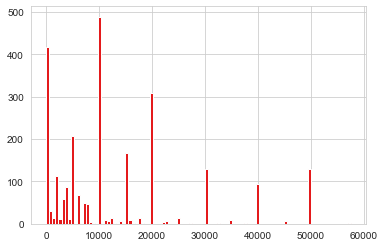

In [105]:
five_boros[(five_boros['total_bail']>=1)
           & (five_boros['total_bail']<60000)] \
            .total_bail.hist(bins=100)

Lots of \\$1 Bails. Also \\$10K is the most common followed by \\$20K in the five boros of NYC

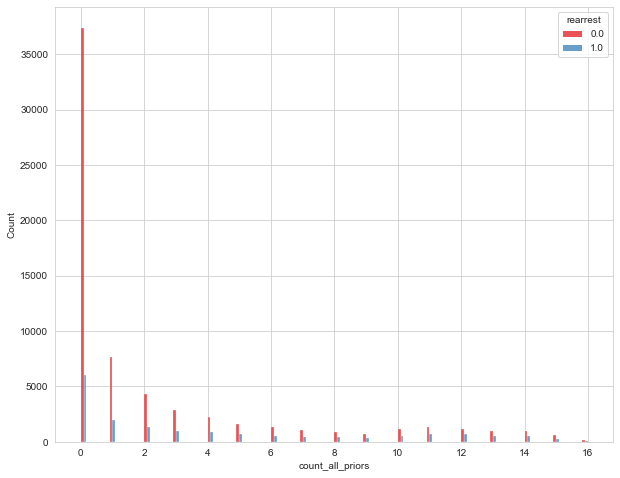

In [115]:
plt.figure(figsize=(10,8))
sns.histplot(data=five_boros, x='count_all_priors', hue='rearrest',
             palette="Set1",multiple='dodge')
plt.show()

In [43]:
df.groupby(['rearrest','prior_vfo_cnt'],dropna=False).count()["court_name"]

rearrest  prior_vfo_cnt
0.0       0.0              103876
          1.0               14468
          2.0                4074
1.0       0.0               23897
          1.0                5223
          2.0                1418
NaN       NaN               31162
Name: court_name, dtype: int64

In [46]:
df.groupby(['rearrest','prior_nonvfo_cnt'], dropna=False).count()["court_name"]

rearrest  prior_nonvfo_cnt
0.0       0.0                 92882
          1.0                 15994
          2.0                  6956
          3.0                  3359
          4.0                  3227
1.0       0.0                 19565
          1.0                  5602
          2.0                  2674
          3.0                  1216
          4.0                  1481
NaN       NaN                 31162
Name: court_name, dtype: int64

In [40]:
df.groupby(['prior_misd_cnt'], dropna=False).count()["court_name"]/len(df)

prior_misd_cnt
0.0     0.443520
1.0     0.109430
2.0     0.061211
3.0     0.040995
4.0     0.031355
5.0     0.023029
6.0     0.018499
7.0     0.013801
8.0     0.012204
9.0     0.009163
10.0    0.067544
NaN     0.169250
Name: court_name, dtype: float64